  Age Group  Year Period  Unemployment_Rate
0     16-19  2024    M09               14.3
1     16-19  2024    M08               14.1
2     16-19  2024    M07               12.4
3     16-19  2024    M06               12.1
4     16-19  2024    M05               12.3
Columns in dataframe: ['Age Group', 'Year', 'Period', 'Unemployment_Rate', 'Month', 'Date']
First few rows of Month column: 0    9
1    8
2    7
3    6
4    5
Name: Month, dtype: int64

Annual Hiring Gap Analysis:
--------------------------------------------------------------------------------
Year    Target    Feasible    Gap    Gap Rate
--------------------------------------------------------------------------------
2024   102,426     162,664  60,238     58.8%
2025   112,456     161,757  49,301     43.8%
2026   123,606     158,130  34,524     27.9%
2027   136,019     154,503  18,484     13.6%
2028   149,859     150,876   1,017      0.7%
2029   160,548     147,249  -13,299     -8.3%
2030   176,924     143,622  -33,302    -18.

/Users/kylewu/Downloads/amazon-recruting-model/calculator/feasible_to_hire_calculator.py:50: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=last_date, periods=121, freq='M')[1:]
/Users/kylewu/Downloads/amazon-recruting-model/calculator/feasible_to_hire_calculator.py:50: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=last_date, periods=121, freq='M')[1:]
/Users/kylewu/Downloads/amazon-recruting-model/calculator/feasible_to_hire_calculator.py:50: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=last_date, periods=121, freq='M')[1:]
/Users/kylewu/Downloads/amazon-recruting-model/calculator/feasible_to_hire_calculator.py:50: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  futur

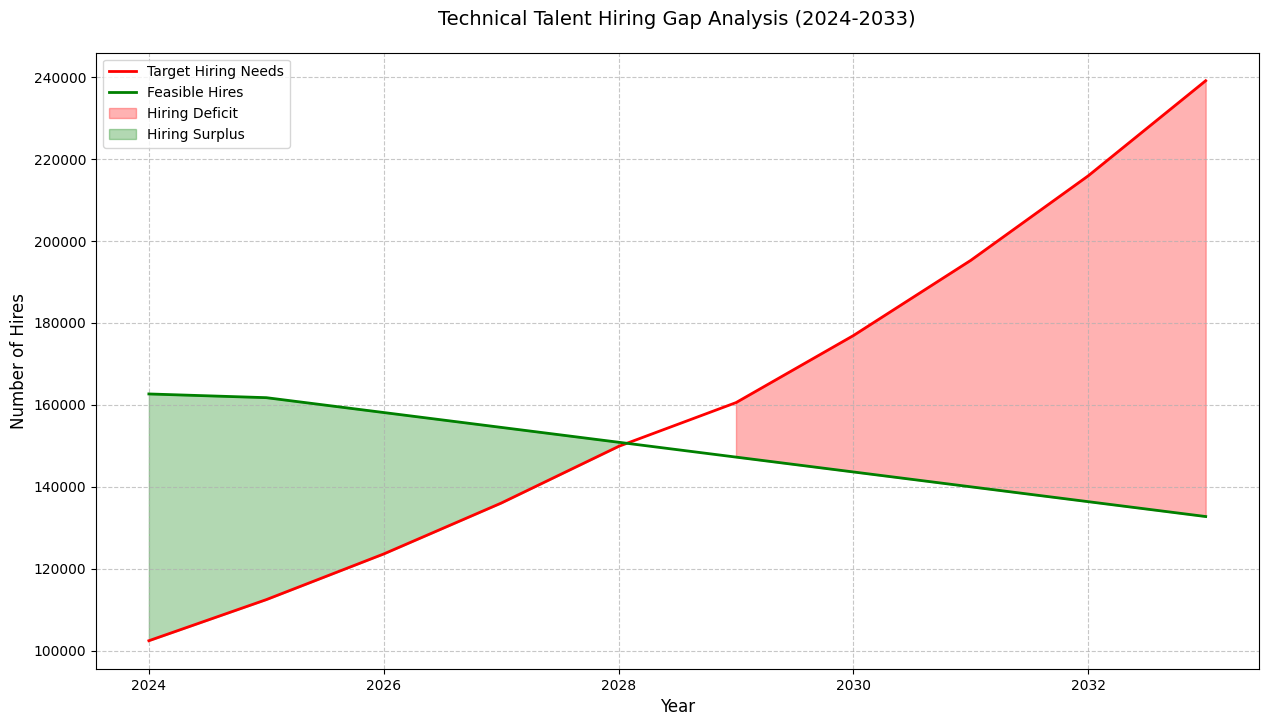

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
from pathlib import Path
sys.path.append(str(Path().absolute().parent))  # 添加父目录到 Python 路径

from parameters.channel_assumption import channel_population, hiring_channels
from parameters.age_group_assumption import age_group_mapping
from calculator.feasible_to_hire_calculator import predict_unemployment_rates, get_feasible_hires_by_year
from calculator.total_hire_target_calculator import calculate_projections, get_annual_hiring_needs

# Get historical unemployment data
historical_data = pd.read_csv('../data/bls_unemployment_by_age_group.csv')
predictions_by_age = predict_unemployment_rates(historical_data)

# Calculate projections and get hiring needs
df = calculate_projections()
hiring_needs = get_annual_hiring_needs(df)

feasible_hires = get_feasible_hires_by_year(
    channel_population, 
    hiring_channels, 
    predictions_by_age, 
    age_group_mapping
)

# Calculate hiring gap
hiring_gap = pd.DataFrame(index=range(2024, 2034))
hiring_gap['Target_Hires'] = hiring_needs['Total_Hires'].values  # Changed from 'Total_Hires' column
hiring_gap['Feasible_Hires'] = feasible_hires['Feasible_Hires'].astype(float)
hiring_gap['Gap'] = hiring_gap['Feasible_Hires'] - hiring_gap['Target_Hires']
hiring_gap['Gap_Percentage'] = (hiring_gap['Gap'] / hiring_gap['Target_Hires']) * 100

# Create visualization
plt.figure(figsize=(15, 8))
plt.plot(hiring_gap.index, hiring_gap['Target_Hires'].values, 'r-', 
         label='Target Hiring Needs', linewidth=2)
plt.plot(hiring_gap.index, hiring_gap['Feasible_Hires'].values, 'g-', 
         label='Feasible Hires', linewidth=2)
plt.fill_between(hiring_gap.index, 
                hiring_gap['Target_Hires'].values, 
                hiring_gap['Feasible_Hires'].values,
                where=(hiring_gap['Gap'].values < 0),
                color='red', alpha=0.3, label='Hiring Deficit')
plt.fill_between(hiring_gap.index,
                hiring_gap['Target_Hires'].values,
                hiring_gap['Feasible_Hires'].values,
                where=(hiring_gap['Gap'].values >= 0),
                color='green', alpha=0.3, label='Hiring Surplus')

plt.title('Technical Talent Hiring Gap Analysis (2024-2033)', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Hires', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

print("\nAnnual Hiring Gap Analysis:")
print("-" * 80)
print("Year    Target    Feasible    Gap    Gap Rate")
print("-" * 80)
for year in hiring_gap.index:
    target = hiring_gap.loc[year, 'Target_Hires']
    feasible = hiring_gap.loc[year, 'Feasible_Hires']
    gap = hiring_gap.loc[year, 'Gap']
    gap_rate = hiring_gap.loc[year, 'Gap_Percentage']
    
    # Changed format specifier from ,d to ,.0f for floating point numbers
    print(f"{year}  {target:>8,.0f}  {feasible:>10,.0f}  {gap:>6,.0f}  {gap_rate:>7.1f}%")


# Output key findings
print("\nKey Findings:")
print("-" * 80)
print(f"1. Average Annual Gap: {hiring_gap['Gap'].mean():,.0f} people")
print(f"2. Largest Gap Year: {hiring_gap['Gap'].idxmin()}, Gap: {hiring_gap['Gap'].min():,.0f} people")
print(f"3. Cumulative 10-Year Gap: {hiring_gap['Gap'].sum():,.0f} people")
print(f"4. Number of Years with Deficit: {(hiring_gap['Gap'] < 0).sum():,d} years")

# Calculate the total deficit that needs to be addressed
total_deficit = abs(hiring_gap.loc[hiring_gap['Gap'] < 0, 'Gap'].sum())
print(f"\nTotal Deficit to Address: {total_deficit:,.0f} people")

plt.show()

**Consider Attrition and Retention**

  Age Group  Year Period  Unemployment_Rate
0     16-19  2024    M09               14.3
1     16-19  2024    M08               14.1
2     16-19  2024    M07               12.4
3     16-19  2024    M06               12.1
4     16-19  2024    M05               12.3
Columns in dataframe: ['Age Group', 'Year', 'Period', 'Unemployment_Rate', 'Month', 'Date']
First few rows of Month column: 0    9
1    8
2    7
3    6
4    5
Name: Month, dtype: int64

Annual Hiring Gap Analysis:
----------------------------------------------------------------------------------------------------
Year    Base Target    Attrition    Retainable    Net Target    Feasible    Gap    Gap Rate
----------------------------------------------------------------------------------------------------
2024      102,426      98,277       46,523      154,180    162,664   8,484      5.5%
2025      112,456     107,592       50,934      169,114    161,757  -7,357     -4.4%
2026      123,606     117,868       55,797      185,677   

/Users/kylewu/Downloads/amazon-recruting-model/calculator/feasible_to_hire_calculator.py:50: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=last_date, periods=121, freq='M')[1:]
/Users/kylewu/Downloads/amazon-recruting-model/calculator/feasible_to_hire_calculator.py:50: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=last_date, periods=121, freq='M')[1:]
/Users/kylewu/Downloads/amazon-recruting-model/calculator/feasible_to_hire_calculator.py:50: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=last_date, periods=121, freq='M')[1:]
/Users/kylewu/Downloads/amazon-recruting-model/calculator/feasible_to_hire_calculator.py:50: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  futur

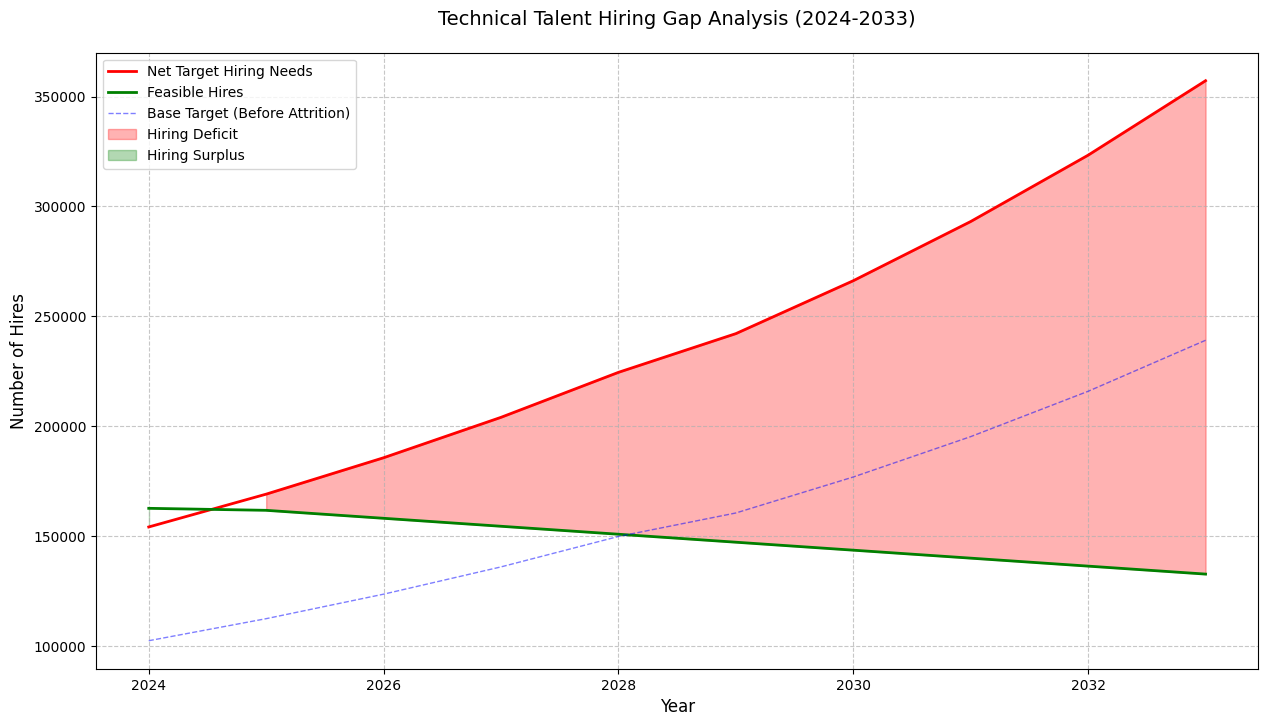

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
from pathlib import Path
sys.path.append(str(Path().absolute().parent))

from parameters.channel_assumption import channel_population, hiring_channels
from parameters.age_group_assumption import age_group_mapping
from calculator.feasible_to_hire_calculator import predict_unemployment_rates, get_feasible_hires_by_year
from calculator.total_hire_target_calculator import calculate_projections, get_annual_hiring_needs
from calculator.retention_calculator import calculate_detailed_attrition, calculate_retainable_employees

# Get historical unemployment data
historical_data = pd.read_csv('../data/bls_unemployment_by_age_group.csv')
predictions_by_age = predict_unemployment_rates(historical_data)

# Calculate projections and get hiring needs
df = calculate_projections()
hiring_needs = get_annual_hiring_needs(df)

# Get feasible hires
feasible_hires = get_feasible_hires_by_year(
    channel_population, 
    hiring_channels, 
    predictions_by_age, 
    age_group_mapping
)

# Get attrition and retainable numbers
attrition_df = calculate_detailed_attrition('median')
retainable_df = calculate_retainable_employees('median')

attrition_df = attrition_df[attrition_df['Year'].between(2024, 2033)].reset_index(drop=True)
retainable_df = retainable_df[retainable_df['Year'].between(2024, 2033)].reset_index(drop=True)


# Calculate hiring gap
hiring_gap = pd.DataFrame(index=range(2024, 2034))
hiring_gap['Base_Target_Hires'] = hiring_needs['Total_Hires'].values
hiring_gap['Attrition'] = attrition_df['Total_Attrition'].values
hiring_gap['Retainable'] = retainable_df['Total_Retainable'].values
hiring_gap['Net_Target_Hires'] = hiring_gap['Base_Target_Hires'] + hiring_gap['Attrition'] - hiring_gap['Retainable']
hiring_gap['Feasible_Hires'] = feasible_hires['Feasible_Hires'].astype(float)
hiring_gap['Gap'] = hiring_gap['Feasible_Hires'] - hiring_gap['Net_Target_Hires']
hiring_gap['Gap_Percentage'] = (hiring_gap['Gap'] / hiring_gap['Net_Target_Hires']) * 100

# Create visualization
plt.figure(figsize=(15, 8))
plt.plot(hiring_gap.index, hiring_gap['Net_Target_Hires'].values, 'r-', 
         label='Net Target Hiring Needs', linewidth=2)
plt.plot(hiring_gap.index, hiring_gap['Feasible_Hires'].values, 'g-', 
         label='Feasible Hires', linewidth=2)
plt.plot(hiring_gap.index, hiring_gap['Base_Target_Hires'].values, 'b--', 
         label='Base Target (Before Attrition)', linewidth=1, alpha=0.5)

plt.fill_between(hiring_gap.index, 
                hiring_gap['Net_Target_Hires'].values, 
                hiring_gap['Feasible_Hires'].values,
                where=(hiring_gap['Gap'].values < 0),
                color='red', alpha=0.3, label='Hiring Deficit')
plt.fill_between(hiring_gap.index,
                hiring_gap['Net_Target_Hires'].values,
                hiring_gap['Feasible_Hires'].values,
                where=(hiring_gap['Gap'].values >= 0),
                color='green', alpha=0.3, label='Hiring Surplus')

plt.title('Technical Talent Hiring Gap Analysis (2024-2033)', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Hires', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

print("\nAnnual Hiring Gap Analysis:")
print("-" * 100)
print("Year    Base Target    Attrition    Retainable    Net Target    Feasible    Gap    Gap Rate")
print("-" * 100)
for year in hiring_gap.index:
    base = hiring_gap.loc[year, 'Base_Target_Hires']
    attrition = hiring_gap.loc[year, 'Attrition']
    retainable = hiring_gap.loc[year, 'Retainable']
    net = hiring_gap.loc[year, 'Net_Target_Hires']
    feasible = hiring_gap.loc[year, 'Feasible_Hires']
    gap = hiring_gap.loc[year, 'Gap']
    gap_rate = hiring_gap.loc[year, 'Gap_Percentage']
    
    print(f"{year}  {base:>11,.0f}  {attrition:>10,.0f}  {retainable:>11,.0f}  {net:>11,.0f}  {feasible:>9,.0f}  {gap:>6,.0f}  {gap_rate:>7.1f}%")

# Output key findings
print("\nKey Findings:")
print("-" * 80)
print(f"1. Average Annual Gap: {hiring_gap['Gap'].mean():,.0f} people")
print(f"2. Largest Gap Year: {hiring_gap['Gap'].idxmin()}, Gap: {hiring_gap['Gap'].min():,.0f} people")
print(f"3. Cumulative 10-Year Gap: {hiring_gap['Gap'].sum():,.0f} people")
print(f"4. Number of Years with Deficit: {(hiring_gap['Gap'] < 0).sum():,d} years")
print(f"5. Average Annual Attrition: {hiring_gap['Attrition'].mean():,.0f} people")
print(f"6. Average Retainable: {hiring_gap['Retainable'].mean():,.0f} people")

# Calculate the total deficit that needs to be addressed
total_deficit = abs(hiring_gap.loc[hiring_gap['Gap'] < 0, 'Gap'].sum())
print(f"\nTotal Deficit to Address: {total_deficit:,.0f} people")

plt.show()

In [3]:
import sys
sys.path.append('../')
from parameters.age_group_assumption import productivity_by_age_group, workforce_by_age_group, compensation_by_age_group
from parameters.retention_assumption import HIRING_COST_RATE

def calculate_gap_cost(hiring_gap_df):
    """
    Calculate the cost of hiring gaps considering productivity loss and saved hiring costs
    """
    # Calculate weighted average productivity and compensation
    avg_productivity = sum(
        productivity_by_age_group[age] * pct 
        for age, pct in workforce_by_age_group.items()
    )
    
    avg_compensation = sum(
        compensation_by_age_group[age] * pct 
        for age, pct in workforce_by_age_group.items()
    )
    
    # Calculate hiring cost per person
    avg_hiring_cost = avg_compensation * HIRING_COST_RATE
    
    # Calculate costs for each year
    cost_analysis = pd.DataFrame(index=hiring_gap_df.index)
    cost_analysis['Gap'] = hiring_gap_df['Gap']
    cost_analysis['Productivity_Loss'] = -cost_analysis['Gap'].apply(
        lambda x: x * avg_productivity if x < 0 else 0
    )
    cost_analysis['Saved_Hiring_Cost'] = -cost_analysis['Gap'].apply(
        lambda x: x * avg_hiring_cost if x < 0 else 0
    )
    cost_analysis['Net_Cost'] = cost_analysis['Productivity_Loss'] - cost_analysis['Saved_Hiring_Cost']
    
    return cost_analysis

# Calculate costs
cost_analysis = calculate_gap_cost(hiring_gap)

# Print cost analysis
print("\nAnnual Cost Analysis of Hiring Gap:")
print("-" * 100)
print("Year    Gap    Productivity Loss    Saved Hiring Cost    Net Cost")
print("-" * 100)
for year in cost_analysis.index:
    gap = cost_analysis.loc[year, 'Gap']
    prod_loss = cost_analysis.loc[year, 'Productivity_Loss']
    saved_cost = cost_analysis.loc[year, 'Saved_Hiring_Cost']
    net_cost = cost_analysis.loc[year, 'Net_Cost']
    
    print(f"{year}  {gap:>6,.0f}  {prod_loss:>16,.0f}  {saved_cost:>17,.0f}  {net_cost:>9,.0f}")

# Print summary statistics
print("\nCost Analysis Summary:")
print("-" * 80)
print(f"1. Total Productivity Loss: ${cost_analysis['Productivity_Loss'].sum():,.0f}")
print(f"2. Total Saved Hiring Cost: ${cost_analysis['Saved_Hiring_Cost'].sum():,.0f}")
print(f"3. Total Net Cost: ${cost_analysis['Net_Cost'].sum():,.0f}")
print(f"4. Average Annual Net Cost: ${cost_analysis['Net_Cost'].mean():,.0f}")


Annual Cost Analysis of Hiring Gap:
----------------------------------------------------------------------------------------------------
Year    Gap    Productivity Loss    Saved Hiring Cost    Net Cost
----------------------------------------------------------------------------------------------------
2024   8,484                -0                 -0          0
2025  -7,357     3,527,894,788        537,737,248  2,990,157,540
2026  -27,547    13,208,816,044      2,013,345,866  11,195,470,178
2027  -49,567    23,767,290,288      3,622,714,972  20,144,575,317
2028  -73,655    35,317,734,980      5,383,284,578  29,934,450,402
2029  -94,902    45,505,499,625      6,936,148,496  38,569,351,129
2030  -122,605    58,788,953,200      8,960,870,943  49,828,082,257
2031  -153,168    73,444,086,385     11,194,670,831  62,249,415,553
2032  -186,978    89,655,922,349     13,665,750,208  75,990,172,141
2033  -224,480   107,638,071,309     16,406,668,481  91,231,402,828

Cost Analysis Summary:
-----